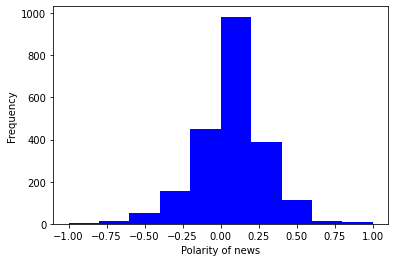

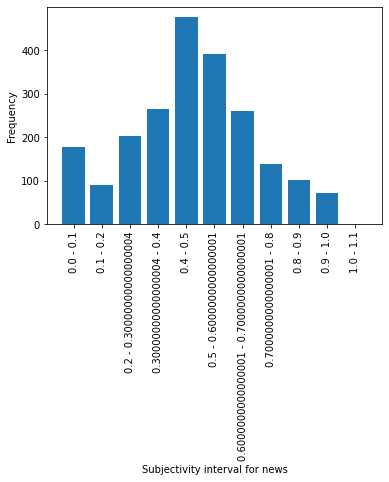

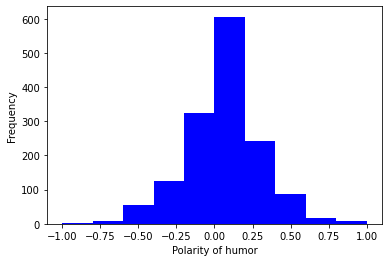

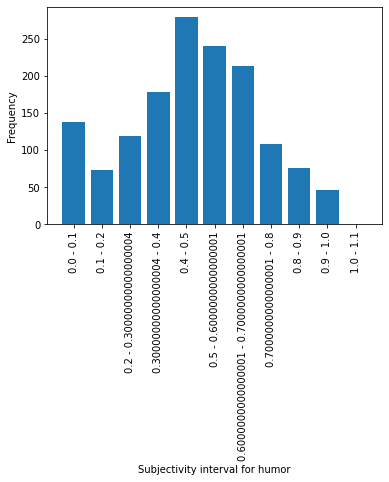

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[(('ca', 'nt'), 58), (('nt', 'know'), 39), (('would', 'nt'), 37), (('ayy', 'ayy'), 31), (('wo', 'nt'), 23), (('nt', 'get'), 22), (('every', 'time'), 19), (('gon', 'na'), 16), (('nt', 'like'), 14), (('nt', 'want'), 13)]
[(('ca', 'nt'), 81), (('wo', 'nt'), 42), (('nt', 'know'), 39), (('would', 'nt'), 36), (('nt', 'even'), 28), (('nt', 'want'), 26), (('bernie', 'sanders'), 23), (('could', 'nt'), 20), (('supreme', 'court'), 20), (('submission', 'statement'), 20)]
[('nt', 586), ('like', 265), ('one', 212), ('would', 203), ('people', 201), ('get', 174), ('time', 144), ('know', 126), ('guy', 104), ('really', 101)]
[('nt', 740), ('people', 427), ('would', 347), ('like', 345), ('get', 239), ('one', 235), ('think', 182), ('even', 168), ('know', 155), ('really', 150)]


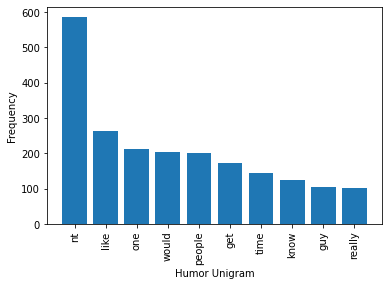

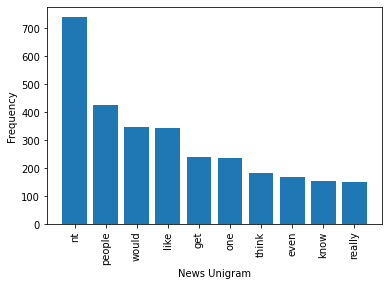

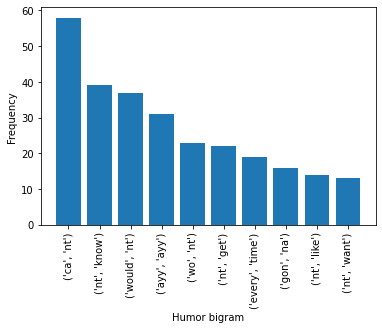

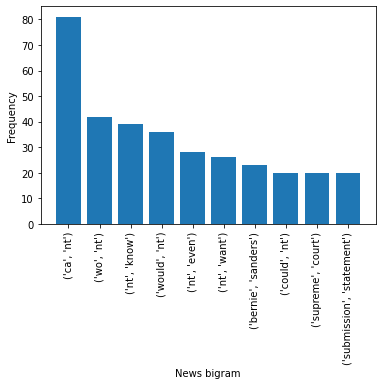

Mean of polarity humor is:  0.05158728575619279
Standard Deviation of polarity humor is:  0.24866391452327927
Mean of polarity news is:  0.064048534801197
Standard Deviation of polarity news is:  0.23041556585535447
Mean of subjectivity humor is:  0.47140332998753287
Standard Deviation of subjectivity humor is:  0.24269324821277793
Mean of subjectivity news is:  0.4704749753548112
Standard Deviation of subjectivity news is:  0.23274569397299044


In [ ]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
reddit_df = pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/redditDataset.pkl")
redditdata=reddit_df.to_numpy();
#print(redditdata)
d1={}
dataset=[];
features=[];label=[];
X=[];
count=0;
for i in redditdata:
  if(i[0] not in d1.keys()):
    l1=[];l1.append(i[0]);
    features.append(i[0]);
    if(i[1]=='humor'):
      l1.append(1);
      label.append(1);
    else:
      label.append(0);
      l1.append(0);
    dataset.append(l1)
    count+=1
    d1[i[0]]=1;
  else:
    d1[i[0]]=1;
X=[];y=[];
polarlist_humor=[];subjectivelist_humor=[];humortext="";
polarlist_news=[];subjectivelist_news=[];newstext="";
counter1=0;
for i in dataset:
  a=TextBlob(i[0]);b=i[1];
  first=a.polarity
  second=a.subjectivity
  if(b==1):
    humortext+=i[0];
    polarlist_humor.append(first);subjectivelist_humor.append(second);
  else:
    newstext+=i[0];
    polarlist_news.append(first);subjectivelist_news.append(second);
  l1=[];l1.append(first);l1.append(second);
  X.append(l1);y.append(i[1]);



# plotting distributing of polarity and subjectivity:


def plotter(list1,yname, xnames):
  min1=min(list1);max1=max(list1);
  interval=(max1-min1)/10
  freq1=[0]*11;
  for i in list1:
    freq1[(int)(i//interval)]+=1
  bucket=[0]*11;
  for i in range(11):
    bucket[i]=str(i*interval)+" - "+str((i+1)*interval);
  plt.bar(bucket, freq1);
  plt.xlabel(xnames);plt.ylabel(yname);
  plt.xticks(rotation=90)
  plt.show();

plt.hist(polarlist_news, bins = 10, color = 'b')
plt.xlabel("Polarity of news");plt.ylabel("Frequency");
plt.show();
plotter(subjectivelist_news, "Frequency", "Subjectivity interval for news");
plt.hist(polarlist_humor, bins = 10, color = 'b')
plt.xlabel("Polarity of humor");plt.ylabel("Frequency");
plt.show();
plotter(subjectivelist_humor, "Frequency", "Subjectivity interval for humor");


# Unigrams and Bigrams
import nltk
nltk.download('stopwords');nltk.download('punkt')
from nltk import word_tokenize
from nltk.corpus import stopwords;
stopwords = set(stopwords.words('english'))
humor_token = word_tokenize(humortext);  
filteredhumorsentence = [w for w in humor_token if not w in stopwords]   
humor_bigram=nltk.bigrams(filteredhumorsentence);
mostfrequentbigrams1=nltk.FreqDist(humor_bigram).most_common(10);
print(mostfrequentbigrams1);



news_token = word_tokenize(newstext);  
filterednewssentence = [w for w in news_token if not w in stopwords]   
news_bigram=nltk.bigrams(filterednewssentence);
mostfrequentbigrams2=nltk.FreqDist(news_bigram).most_common(10);
print(mostfrequentbigrams2);


  
humor_unigram=nltk.FreqDist(filteredhumorsentence).most_common(10);
print(humor_unigram);

  
news_unigram=nltk.FreqDist(filterednewssentence).most_common(10);
print(news_unigram);

def gram_plotter(l1, xname, yname):
  values=[];
  freq=[];
  for i in l1:
    values.append(str(i[0]));
    freq.append(i[1]);
  plt.bar(values, freq);
  plt.xlabel(xname);plt.ylabel(yname);
  plt.xticks(rotation=90)
  plt.show();

gram_plotter(humor_unigram, "Humor Unigram","Frequency");
gram_plotter(news_unigram, "News Unigram","Frequency");
gram_plotter(mostfrequentbigrams1, "Humor bigram","Frequency");
gram_plotter(mostfrequentbigrams2, "News bigram","Frequency");



# Mean and Standard deviation

print("Mean of polarity humor is: ",np.mean(polarlist_humor))
print("Standard Deviation of polarity humor is: ",np.std(polarlist_humor));

print("Mean of polarity news is: ",np.mean(polarlist_news))
print("Standard Deviation of polarity news is: ",np.std(polarlist_news));

print("Mean of subjectivity humor is: ",np.mean(subjectivelist_humor))
print("Standard Deviation of subjectivity humor is: ",np.std(subjectivelist_humor));

print("Mean of subjectivity news is: ",np.mean(subjectivelist_news))
print("Standard Deviation of subjectivity news is: ",np.std(subjectivelist_news));

In [ ]:
Xdf=pd.DataFrame(data=X, columns=['Polarity', 'Subjectivity']);
Ydf=pd.DataFrame(data=y, columns=['label']);
## splitting test and train dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size = 0.3, random_state = 1)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
#making vection
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
#building classifier
classifier = LogisticRegression(random_state =0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

0.7928832116788321
[[545  84]
 [143 324]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       629
           1       0.79      0.69      0.74       467

    accuracy                           0.79      1096
   macro avg       0.79      0.78      0.78      1096
weighted avg       0.79      0.79      0.79      1096

